# Mehrkanal-Bilddaten
Neben zweidimensionalen Bildern, die als 2D-Matrix ausgedrückt werden können, sind auch höherdimensionale Mehrkanal-Bilder recht häufig. Importieren wir zum Beispiel das Bild ```hela-cells.tif```: 

In [1]:
from skimage.io import imread
image = imread('../../data/hela-cells.tif')


In [2]:
image.shape

(512, 672, 3)

Wir sehen, dass wir statt nur Pixelzeilen und -spalten nun eine zusätzliche Zahl haben, die uns sagt, dass wir drei Ebenen in unseren Daten haben. In diesem Fall entspricht jedes Bild einem Kanal, aber für andere Daten könnten es Z-Ebenen, Zeitpunkte usw. sein.

## Spielen mit Dimensionen

Das Umorganisieren mehrdimensionaler Daten ist oft notwendig, um der Eingabe einer Funktion zu entsprechen. Zum Beispiel erwartet ```microshow```, dass die Kanäle in der ersten Dimension sind, also müssen wir die letzte Achse in die erste Position *verschieben* und dafür die Numpy-Funktion ```np.moveaxis``` verwenden:

In [3]:
import numpy as np

image_rolled = np.moveaxis(image, source=2, destination=0)
image_rolled.shape

(3, 512, 672)

Es gibt in Numpy viele andere Funktionen für diese Achsenverschiebungsoperationen. Zum Beispiel ```np.swapaxes```, ```np.rollaxis``` usw.

## Visualisierung von Mehrkanal-Bildern

Die Funktion ```microshow``` kümmert sich um die Anzeige des Bildes mit vernünftigen Standardeinstellungen:

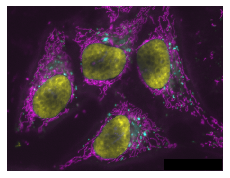

In [4]:
from microfilm.microplot import microshow
microshow(image_rolled);

Standardmäßig verwendet sie eine Kombination aus Cyan-, Magenta- und Gelb-Farbkarten, aber diese können auch geändert werden:

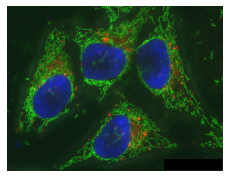

In [5]:
microshow(image_rolled, cmaps=['pure_red', 'pure_green', 'pure_blue']);

Wir können diese drei Kanäle auch unabhängig voneinander visualisieren, indem wir sie aufteilen. Darüber hinaus können wir mehrere Bilder nebeneinander anordnen, indem wir [matplotlib subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) verwenden:

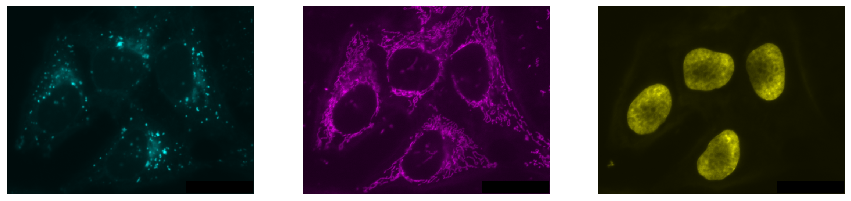

In [6]:
channel1 = image[:,:,0]
channel2 = image[:,:,1]
channel3 = image[:,:,2]

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15,15))

microshow(channel1, ax=axs[0], cmaps='pure_cyan')
microshow(channel2, ax=axs[1], cmaps='pure_magenta')
microshow(channel3, ax=axs[2], cmaps='pure_yellow');

## Übung
Erkunden Sie Look-up-Tabellen, auch bekannt als [Farbkarten in matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html), und visualisieren Sie die drei obigen Kanäle so ähnlich wie möglich, wie das Bild in ImageJ visualisiert wird.